In [1]:
import h5py
import numpy as np
import matlab.engine
import sys
import matplotlib.pyplot as plt
import math
import torch
import os
import size_transforms as size_T


In [2]:
eng = matlab.engine.start_matlab()

In [3]:
input_folder = "gannet_acc_load_ranges"
filenames = os.listdir(input_folder)
filenames = [i.replace(".mat","") for i in filenames]

output_folder = "C:/Users/rodrigo/Documents/gaba_edited_mrs_acceleration/data/indiv_specreg_ranges"



In [5]:
quickstart = 0

for step,filename in enumerate(filenames):
    if step<quickstart:
        continue
    
    true_name = filename.split("_range")[0]
    mrs_struct_target = eng.load(f"gannet_full_load/{true_name}.mat")["mrs_struct"]

    struct_freq = torch.from_numpy(np.array(mrs_struct_target["spec"]["freq"]))[0]

    target = size_T.spec_resampling_1d(torch.from_numpy(np.array(mrs_struct_target["spec"]["vox1"]["GABAGlx"]["diff"])[0]),struct_freq,size_T.ref_freq_short)
    target_on = size_T.spec_resampling_1d(torch.from_numpy(np.array(mrs_struct_target["spec"]["vox1"]["GABAGlx"]["on"])[0]),struct_freq,size_T.ref_freq_short)
    target_off = size_T.spec_resampling_1d(torch.from_numpy(np.array(mrs_struct_target["spec"]["vox1"]["GABAGlx"]["off"])[0]),struct_freq,size_T.ref_freq_short)

    del mrs_struct_target

    mrs_struct_acc = eng.load(f"gannet_acc_load_ranges/{filename}.mat")["mrs_struct"]

    specs = torch.from_numpy(np.array(mrs_struct_acc["spec"]["AllFramesFTrealign"]))
    transients_specs_on_off = size_T.spec_resampling(specs,struct_freq,size_T.ref_freq_short)
    
    on_off = torch.from_numpy(np.array(mrs_struct_acc["fids"]["ON_OFF"]))[0]

    transient_specs = torch.zeros(size=(transients_specs_on_off.shape[0],2,transients_specs_on_off.shape[1]//2),dtype=transients_specs_on_off.dtype)


    on_counter=0
    off_counter=0
    for i in range(on_off.shape[0]):
        if on_off[i]==0:
            transient_specs[:,0,off_counter]=transients_specs_on_off[:,i]
            off_counter+=1
        elif on_off[i]==1:
            transient_specs[:,1,on_counter]=transients_specs_on_off[:,i]
            on_counter+=1
        else:
            raise Exception("on off error")
        
    with h5py.File(f"{output_folder}/{filename}.h5","w") as hf:
        hf.create_dataset("transient_specs",data=transient_specs)
        hf.create_dataset("ppm",data=size_T.ref_freq_short)
        hf.create_dataset("target",data=target)
        hf.create_dataset("target_off",data=target_off)
        hf.create_dataset("target_on",data=target_on)
    #break

    print(f"{step+1}/{len(filenames)} - {filename}")

1/3600 - g4_s01_range_101_180
2/3600 - g4_s01_range_111_190
3/3600 - g4_s01_range_11_90
4/3600 - g4_s01_range_121_200
5/3600 - g4_s01_range_131_210
6/3600 - g4_s01_range_141_220
7/3600 - g4_s01_range_151_230
8/3600 - g4_s01_range_161_240
9/3600 - g4_s01_range_171_250
10/3600 - g4_s01_range_181_260
11/3600 - g4_s01_range_191_270
12/3600 - g4_s01_range_1_80
13/3600 - g4_s01_range_201_280
14/3600 - g4_s01_range_211_290
15/3600 - g4_s01_range_21_100
16/3600 - g4_s01_range_221_300
17/3600 - g4_s01_range_231_310
18/3600 - g4_s01_range_241_320
19/3600 - g4_s01_range_31_110
20/3600 - g4_s01_range_41_120
21/3600 - g4_s01_range_51_130
22/3600 - g4_s01_range_61_140
23/3600 - g4_s01_range_71_150
24/3600 - g4_s01_range_81_160
25/3600 - g4_s01_range_91_170
26/3600 - g4_s02_range_101_180
27/3600 - g4_s02_range_111_190
28/3600 - g4_s02_range_11_90
29/3600 - g4_s02_range_121_200
30/3600 - g4_s02_range_131_210
31/3600 - g4_s02_range_141_220
32/3600 - g4_s02_range_151_230
33/3600 - g4_s02_range_161_240
3

In [11]:
with h5py.File("indiv_specreg/g4_s01.h5") as hf:
    for key in hf:
        print(f"{key} - {hf[key][()].shape}")

ppm - (2048,)
target - (2048,)
target_off - (2048,)
target_on - (2048,)
transient_specs - (2048, 2, 40)


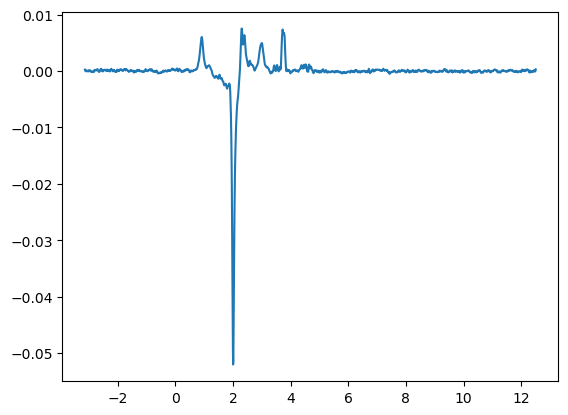

In [6]:
plt.plot(size_T.ref_freq_short,target)
#plt.plot(size_T.ref_freq_short,target_on)
#plt.plot(size_T.ref_freq_short,target_off)
plt.show()

c:\Users\rodrigo\anaconda3\envs\thesis\lib\site-packages\torch\_tensor.py:972: ComplexWarning: Casting complex values to real discards the imaginary part
  return self.numpy().astype(dtype, copy=False)


 ...]

Error in callback <function _draw_all_if_interactive at 0x00000274394051F0> (for post_execute):


KeyboardInterrupt: 

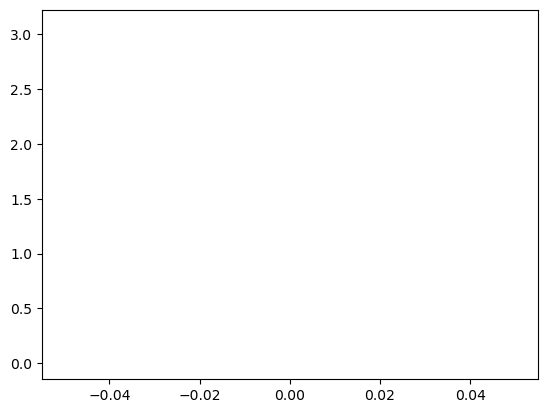

In [5]:
plt.plot(target_on)

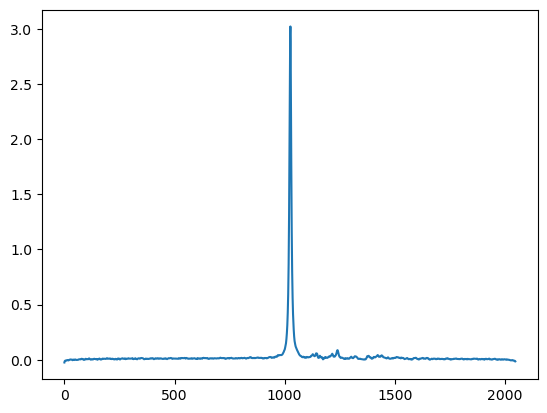

In [15]:
plt.plot(transient_specs[:,1,0])
plt.show()

In [ ]:
mrs_struct = eng.load("c:/Users/rodrigo/Documents/thesis/data/gannet_acc_load/g4_s01.mat")["mrs_struct"]
fid_data = torch.from_numpy(np.array(mrs_struct["fids"]["data"])[:,0])
sw = float(mrs_struct["p"]["sw"])
lb = float(mrs_struct["p"]["LB"])
larmor_freq = float(mrs_struct["p"]["LarmorFreq"])